In [1]:
import csv

def openCSV_getData(file_csv):
    file = open(file_csv)
    type(file)
    csvreader = csv.reader(file)
    rows = []
    for row in csvreader:
        rows.append(row)
    temp = removeScorer_otherInfo(rows)
    data = temp[0]
    imgNames = temp[1]
    return data, imgNames

def removeScorer_otherInfo(csv_file):
    # remove indeces 0-3
    data = csv_file[3:]
    imgNames = []
    for i in range(len(data)):
        imgNames.append(data[i][2])
        temp = data[i]
        temp = temp[3:]
        data[i] = temp
    return [data, imgNames]

def correctImages(img):
    new = []
    numbs = []
    for i in range(len(img)):
        temp = 'frame' 
        t = img[i][3:7] 
        if t[0] == "0":
            t = t[1:]
        temp = temp + t + '.jpg'
        numbs.append(t)
        new.append(temp)
    return new, numbs

import math
def distanceBetweenPoints(x1, y1, x2, y2):
    xDiff = abs(x2 - x1)
    yDiff = abs(y2 - y1)
    xDiff = xDiff**2
    yDiff = yDiff**2
    distance = xDiff + yDiff
    distance = math.pow(distance, 1/2)
    return distance
distanceBetweenPoints(0, 0, 5, 0)

def bubbleSort(arr):
    n = len(arr)
    swapped = False
    for i in range(n-1):
        for j in range(0, n-i-1):
            if arr[j][0] > arr[j + 1][0]:
                swapped = True
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
        if not swapped:
            return
#bubbleSort(errors)

In [2]:
kreiman_csv = "/Users/betinakreiman/Desktop/Life/research/comparing_csv_annotations/3d_csv_files/CollectedData_Kreiman (1).csv"
jaeson_csv = "/Users/betinakreiman/Desktop/Life/research/comparing_csv_annotations/3d_csv_files/CollectedData_Jaeson_Block1Cam1.csv"

kreiman = openCSV_getData(kreiman_csv)
b1_k, img1_k = kreiman[0], kreiman[1]

jaeson = openCSV_getData(jaeson_csv)
b1_j, img1_j = jaeson[0], jaeson[1]

imgs, numbers = correctImages(img1_k)


In [3]:
kreiman_csv_2 = "/Users/betinakreiman/Desktop/Life/research/comparing_csv_annotations/3d_csv_files/CollectedData_Kreiman (2).csv"
jaeson_csv_2 = "/Users/betinakreiman/Desktop/Life/research/comparing_csv_annotations/3d_csv_files/CollectedData_Jaeson_Block1Cam2.csv"

kreiman_2 = openCSV_getData(kreiman_csv_2)
b1_k_2, img1_k_2 = kreiman_2[0], kreiman_2[1]

jaeson_2 = openCSV_getData(jaeson_csv_2)
b1_j_2, img1_j_2 = jaeson_2[0], jaeson_2[1]

imgs_2, numbers_2 = correctImages(img1_k_2)


In [4]:
kreiman_csv_3 = "/Users/betinakreiman/Desktop/Life/research/comparing_csv_annotations/3d_csv_files/CollectedData_Kreiman (3).csv"
jaeson_csv_3 = "/Users/betinakreiman/Desktop/Life/research/comparing_csv_annotations/3d_csv_files/CollectedData_Jaeson_Block1Cam3.csv"

kreiman_3 = openCSV_getData(kreiman_csv_3)
b1_k_3, img1_k_3 = kreiman_3[0], kreiman_3[1]

jaeson_3 = openCSV_getData(jaeson_csv_3)
b1_j_3, img1_j_3 = jaeson_3[0], jaeson_3[1]

imgs_3, numbers_3 = correctImages(img1_k_3)


In [5]:
from matplotlib import image
from matplotlib import pyplot as plt


def showImages(differences, k, j, part):
    for i in range(len(differences)):
        directory = "/Users/betinakreiman/Desktop/Life/research/comparing_csv_annotations/computer_labels_3cam/cam1AllFrames/"
        directory += imgs[differences[i][1]]
        
        img = image.imread(directory)
        plt.plot()
        
        print(differences[i][0], "frame number", imgs[differences[i][1]])
        k_x, k_y = float(k[differences[i][1]][part*2]), float(k[differences[i][1]][part*2+1])
        j_x, j_y = float(j[differences[i][1]][part*2]), float(j[differences[i][1]][part*2+1])

        plt.plot(k_x, k_y, color='b', marker='.', markersize=20)
        plt.plot(j_x, j_y, color='r', marker='.', markersize=20)
        
        # plt.text(0, 0, "hello!", bbox=dict(fill=False, edgecolor='white', linewidth=2))
        
        scalebar = ScaleBar(600/620, 'px', rotation="vertical", scale_loc="right", dimension="pixel-length", color="white", border_pad=0.6, box_alpha=0) # 1 pixel = 0.2 meter
        plt.gca().add_artist(scalebar)
        
        # width_fraction=10/820,
        
        plt.axis('off')
        plt.imshow(img)
        plt.show()
    
        

In [9]:
def bigDistances(kreiman, jaeson, part, count):
    diff = []
    for i in range(count):
        diff.append([0, 0])
        
    for i in range(len(kreiman)):
        k_x, k_y = 0, 0
        j_x, j_y = 0, 0
        if (kreiman[i][part*2]) != '' and (kreiman[i][part*2+1]) != '' and (jaeson[i][part*2]) != '' and (jaeson[i][part*2+1]) != '':
            k_x, k_y = float(kreiman[i][part*2]), float(kreiman[i][part*2+1])
            j_x, j_y = float(jaeson[i][part*2]), float(jaeson[i][part*2+1])
        
        distance = distanceBetweenPoints(k_x, k_y, j_x, j_y)
        if distance > diff[0][0]:
            diff[0] = [distance, i]
            bubbleSort(diff)
    showImages(diff, kreiman, jaeson, part)

55.53227685492196 frame number frame2754.jpg


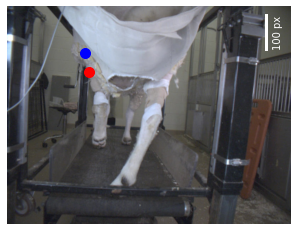

In [10]:
# bigDistances(b1_k, b1_j, 0, 1)
# bigDistances(b1_k, b1_j, 1, 1)
bigDistances(b1_k, b1_j, 2, 1)
# bigDistances(b1_k, b1_j, 3, 1)
# bigDistances(b1_k, b1_j, 4, 1)
# bigDistances(b1_k, b1_j, 5, 1)

In [8]:
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib_scalebar.scalebar import ScaleBar

#plt.figure()
#image = plt.imread(cbook.get_sample_data('grace_hopper.png'))
#plt.imshow(image)
#scalebar = ScaleBar(0.2) # 1 pixel = 0.2 meter
#plt.gca().add_artist(scalebar)
#plt.show()

In [44]:
temp = []
for i in range(len(imgs)):
    temp.append(imgs[i])

In [ ]:
# camera angles

In [47]:
from matplotlib import image
from matplotlib import pyplot as plt


def showImages_camera(differences, k, j, part, angle):
    direct = "/Users/betinakreiman/Desktop/Life/research/comparing_csv_annotations/computer_labels_3cam/cam1AllFrames/"
    if angle == 2:
        direct = "/Users/betinakreiman/Desktop/Life/research/comparing_csv_annotations/computer_labels_3cam/cam2/"
    elif angle == 3:
        direct = "/Users/betinakreiman/Desktop/Life/research/comparing_csv_annotations/computer_labels_3cam/cam3/"

    
    ims = temp[:]
    if angle == 2:
        ims = imgs_2[:]
    elif angle == 3:
        imgs = imgs_3[:]
    
    for i in range(len(differences)):
        directory = direct
        directory += ims[differences[i][1]]
        
        print(directory)
        
        img = image.imread(directory)
        plt.plot()
        
        print(differences[i][0], "frame number", ims[differences[i][1]])
        k_x, k_y = float(k[differences[i][1]][part*2]), float(k[differences[i][1]][part*2+1])
        j_x, j_y = float(j[differences[i][1]][part*2]), float(j[differences[i][1]][part*2+1])

        plt.plot(k_x, k_y, color='b', marker='.', markersize=20)
        plt.plot(j_x, j_y, color='r', marker='.', markersize=20)
        
        #scalebar = ScaleBar(600/620, 'px', rotation="vertical", scale_loc="right", dimension="pixel-length", color="white", border_pad=0.6, box_alpha=0) # 1 pixel = 0.2 meter
        #plt.gca().add_artist(scalebar)
        
        # width_fraction=10/820,
        
        plt.axis('off')
        plt.imshow(img)
        plt.show()
    
        

In [48]:
def bigDistances_camera(kreiman, jaeson, part, count, angle):
    diff = []
    for i in range(count):
        diff.append([0, 0])
        
    for i in range(len(kreiman)):
        k_x, k_y = 0, 0
        j_x, j_y = 0, 0
        if (kreiman[i][part*2]) != '' and (kreiman[i][part*2+1]) != '' and (jaeson[i][part*2]) != '' and (jaeson[i][part*2+1]) != '':
            k_x, k_y = float(kreiman[i][part*2]), float(kreiman[i][part*2+1])
            j_x, j_y = float(jaeson[i][part*2]), float(jaeson[i][part*2+1])
        
        distance = distanceBetweenPoints(k_x, k_y, j_x, j_y)
        if distance > diff[0][0]:
            diff[0] = [distance, i]
            bubbleSort(diff)
            
    showImages_camera(diff, kreiman, jaeson, part, angle)
    

/Users/betinakreiman/Desktop/Life/research/comparing_csv_annotations/computer_labels_3cam/cam2/frame2997.jpg
61.361561429873994 frame number frame2997.jpg


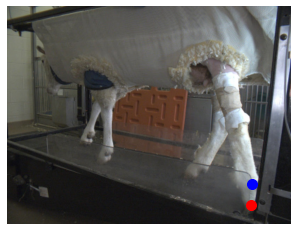

/Users/betinakreiman/Desktop/Life/research/comparing_csv_annotations/computer_labels_3cam/cam2/frame1635.jpg
42.47053840233415 frame number frame1635.jpg


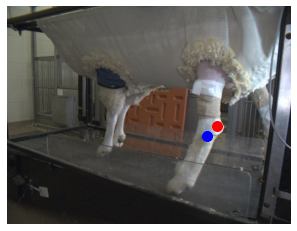

/Users/betinakreiman/Desktop/Life/research/comparing_csv_annotations/computer_labels_3cam/cam2/frame132.jpg
35.235166793062355 frame number frame132.jpg


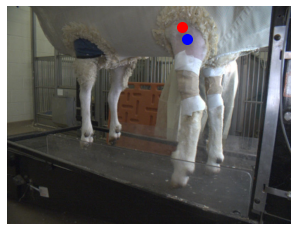

/Users/betinakreiman/Desktop/Life/research/comparing_csv_annotations/computer_labels_3cam/cam2/frame2511.jpg
49.466702330093234 frame number frame2511.jpg


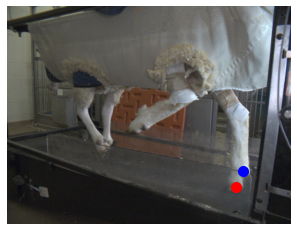

/Users/betinakreiman/Desktop/Life/research/comparing_csv_annotations/computer_labels_3cam/cam2/frame4458.jpg
31.441914850122316 frame number frame4458.jpg


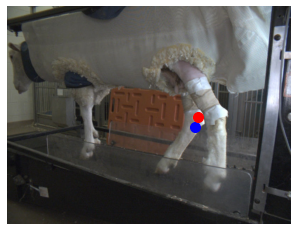

/Users/betinakreiman/Desktop/Life/research/comparing_csv_annotations/computer_labels_3cam/cam2/frame132.jpg
0 frame number frame132.jpg


ValueError: could not convert string to float: 

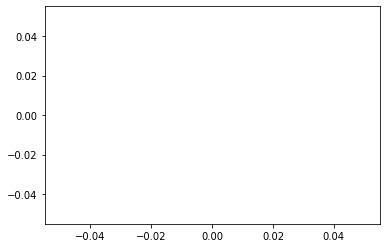

In [49]:
bigDistances_camera(b1_k_2, b1_j_2, 0, 1, 2)
bigDistances_camera(b1_k_2, b1_j_2, 1, 1, 2)
bigDistances_camera(b1_k_2, b1_j_2, 2, 1, 2)
bigDistances_camera(b1_k_2, b1_j_2, 3, 1, 2)
bigDistances_camera(b1_k_2, b1_j_2, 4, 1, 2)
bigDistances_camera(b1_k_2, b1_j_2, 5, 1, 2)

/Users/betinakreiman/Desktop/Life/research/comparing_csv_annotations/computer_labels_3cam/cam3/frame271.jpg
19.57669972983832 frame number frame271.jpg


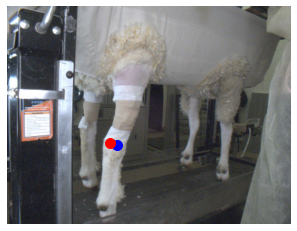

/Users/betinakreiman/Desktop/Life/research/comparing_csv_annotations/computer_labels_3cam/cam3/frame2541.jpg
19.843534310668076 frame number frame2541.jpg


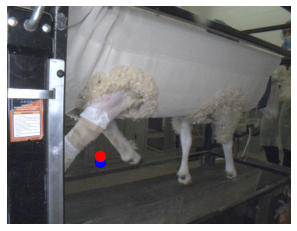

/Users/betinakreiman/Desktop/Life/research/comparing_csv_annotations/computer_labels_3cam/cam3/frame4887.jpg
20.146148690657153 frame number frame4887.jpg


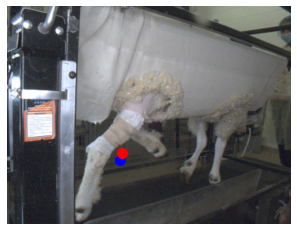

/Users/betinakreiman/Desktop/Life/research/comparing_csv_annotations/computer_labels_3cam/cam3/frame4017.jpg
21.30826069897891 frame number frame4017.jpg


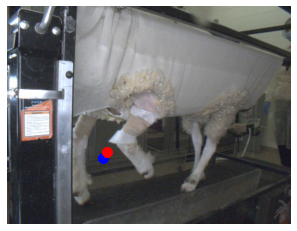

/Users/betinakreiman/Desktop/Life/research/comparing_csv_annotations/computer_labels_3cam/cam3/frame5070.jpg
21.7093909037757 frame number frame5070.jpg


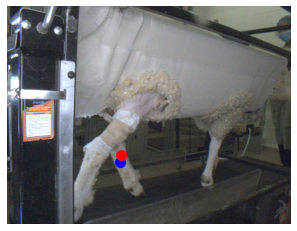

/Users/betinakreiman/Desktop/Life/research/comparing_csv_annotations/computer_labels_3cam/cam3/frame3941.jpg
23.651114124398934 frame number frame3941.jpg


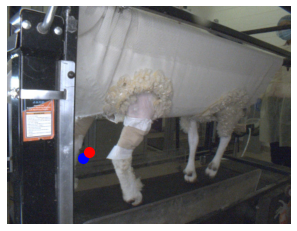

/Users/betinakreiman/Desktop/Life/research/comparing_csv_annotations/computer_labels_3cam/cam3/frame3442.jpg
143.23494043572882 frame number frame3442.jpg


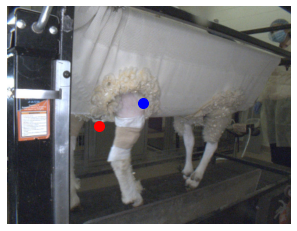

/Users/betinakreiman/Desktop/Life/research/comparing_csv_annotations/computer_labels_3cam/cam3/frame3756.jpg
181.96668969220843 frame number frame3756.jpg


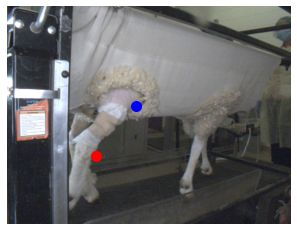

/Users/betinakreiman/Desktop/Life/research/comparing_csv_annotations/computer_labels_3cam/cam3/frame4302.jpg
182.5472637974708 frame number frame4302.jpg


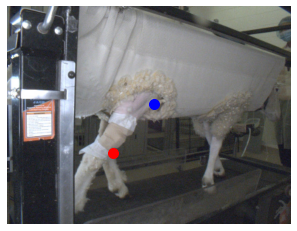

/Users/betinakreiman/Desktop/Life/research/comparing_csv_annotations/computer_labels_3cam/cam3/frame2703.jpg
182.82563911448133 frame number frame2703.jpg


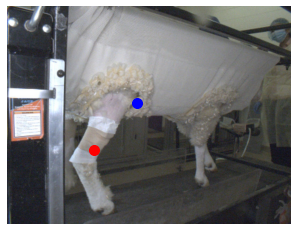

In [62]:
# bigDistances_camera(b1_k_3, b1_j_3, 0, 1, 3)
# bigDistances_camera(b1_k_3, b1_j_3, 1, 1, 3)
# bigDistances_camera(b1_k_3, b1_j_3, 2, 1, 3)
# bigDistances_camera(b1_k_3, b1_j_3, 3, 1, 3)
bigDistances_camera(b1_k_3, b1_j_3, 4, 10, 3)
#bigDistances_camera(b1_k_3, b1_j_3, 5, 1, 3)